In [2]:
# Dependencies
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
lodging = pd.read_csv('../Results/Lodging_Rating.csv')
del lodging['Unnamed: 0']
lodging.replace('NAN', value=0, inplace=True)
lodging = lodging.rename(columns={'lodging Total Count':'Total Count', 'Facility lodging':'Lodging Facility'})
lodging['Rating']=lodging['Rating'].astype(float)
lodging['Total Count']=lodging['Total Count'].astype(int)
lodging.head()

,City Name,Lodging Facility,Latitude,Longitude,Rating,Site Name,Total Count
0,Northern Virginia Area,Fairbrook Hotels,38.96,-77.42,0.0,Center for Innovation Technology,1
1,Northern Virginia Area,BOQ Lodging,38.84,-77.05,5.0,Crystal City and Potomac Yard,2
2,Northern Virginia Area,Navy Lodge,38.84,-77.05,3.4,Crystal City and Potomac Yard,2
3,Washington DC,Navy Gateway Inns and Suites,38.86,-77.01,3.2,Nationals Park/ D.C United Stadium,1
4,Washington DC,Washington DC Accommodations,38.91,-77.02,0.0,Shaw-Howard University Area,1


In [4]:
new_lodging = lodging.groupby(['City Name', 'Site Name'])
lodging_count_df = pd.DataFrame(new_lodging['Site Name'].value_counts())
lodging_count_df = lodging_count_df.rename(columns={'Site Name': 'Total Count'})
lodging_count_df=lodging_count_df.reset_index(level=1)
lodging_count_df = lodging_count_df.reset_index(level=0)
lodging_count_df = lodging_count_df.reset_index(drop=True)
lodging_count_df.head()

,City Name,Site Name,Total Count
0,Atlanta,Downtown Atlanta,2
1,Atlanta,Former GM plant,1
2,Atlanta,Midtown,3
3,Atlanta,The High Street Site,1
4,Austin,American-Statesman,2


In [5]:
lodging_count_final = lodging_count_df.groupby(['City Name'])
lodging_count_final_df = pd.DataFrame(lodging_count_final['Total Count'].median())
lodging_count_final_df = lodging_count_final_df.sort_values(['Total Count'])[::-1]
lodging_count_final_df = lodging_count_final_df.reset_index()
lodging_count_final_df['Type']='Lodging'
lodging_count_final_df

,City Name,Total Count,Type
0,New York,4.0,Lodging
1,Chicago,4.0,Lodging
2,Raleigh,2.0,Lodging
3,Boston,2.0,Lodging
4,Northern Virginia Area,1.5,Lodging
5,Atlanta,1.5,Lodging
6,Washington DC,1.0,Lodging
7,Austin,1.0,Lodging


In [6]:
parking = pd.read_csv('../Results/Parking_Rating.csv')
del parking['Unnamed: 0']
parking.replace('NAN', value=0, inplace=True)
parking = parking.rename(columns={'parking Total Count':'Total Count', 'Facility parking':'Parking Facility'})
parking['Rating']=parking['Rating'].astype(float)
parking['Total Count']=parking['Total Count'].astype(int)
parking.head()

,City Name,Parking Facility,Latitude,Longitude,Rating,Site Name,Total Count
0,Northern Virginia Area,Green Lot,38.96,-77.42,4.0,Center for Innovation Technology,9
1,Northern Virginia Area,Colonial Parking,38.96,-77.42,3.0,Center for Innovation Technology,9
2,Northern Virginia Area,Camden Dulles Station Building I - Parking Garage,38.96,-77.42,5.0,Center for Innovation Technology,9
3,Northern Virginia Area,IAD Parking Garage 1,38.96,-77.42,3.8,Center for Innovation Technology,9
4,Northern Virginia Area,IAD North Employee Parking Lot,38.96,-77.42,5.0,Center for Innovation Technology,9


In [7]:
new_parking = parking.groupby(['City Name', 'Site Name'])
parking_count_df = pd.DataFrame(new_parking['Site Name'].value_counts())
parking_count_df = parking_count_df.rename(columns={'Site Name': 'Total Count'})
parking_count_df=parking_count_df.reset_index(level=1)
parking_count_df = parking_count_df.reset_index(level=0)
parking_count_df = parking_count_df.reset_index(drop=True)
parking_count_df.head()

,City Name,Site Name,Total Count
0,Atlanta,Downtown Atlanta,20
1,Atlanta,Former GM plant,2
2,Atlanta,Midtown,3
3,Atlanta,The High Street Site,5
4,Austin,American-Statesman,20


In [8]:
parking_count_final = parking_count_df.groupby(['City Name'])
parking_count_final_df = pd.DataFrame(parking_count_final['Total Count'].median())
parking_count_final_df = parking_count_final_df.sort_values(['Total Count'])[::-1]
parking_count_final_df = parking_count_final_df.reset_index()
parking_count_final_df['Type']='Parking'
parking_count_final_df

,City Name,Total Count,Type
0,New York,20.0,Parking
1,Chicago,20.0,Parking
2,Boston,20.0,Parking
3,Northern Virginia Area,12.5,Parking
4,Austin,12.0,Parking
5,Raleigh,7.0,Parking
6,Los Angeles,4.0,Parking
7,Atlanta,4.0,Parking


In [9]:
new_accomodation_df = lodging_count_final_df.append(parking_count_final_df)
new_accomodation_df = new_accomodation_df.reset_index(drop=True)
new_accomodation_df = new_accomodation_df.drop([4,11])
new_accomodation_df = new_accomodation_df.reset_index(drop=True)
new_accomodation_df

,City Name,Total Count,Type
0,New York,4.0,Lodging
1,Chicago,4.0,Lodging
2,Raleigh,2.0,Lodging
3,Boston,2.0,Lodging
4,Atlanta,1.5,Lodging
5,Washington DC,1.0,Lodging
6,Austin,1.0,Lodging
7,New York,20.0,Parking
8,Chicago,20.0,Parking
9,Boston,20.0,Parking


       City Name  Total Count
0       New York        12.00
1        Chicago        12.00
2         Boston        11.00
3         Austin         6.50
4        Raleigh         4.50
5    Los Angeles         4.00
6        Atlanta         2.75
7  Washington DC         1.00
{'New York': 1, 'Chicago': 2, 'Boston': 3, 'Austin': 4, 'Raleigh': 5, 'Los Angeles': 6, 'Atlanta': 7, 'Washington DC': 8}


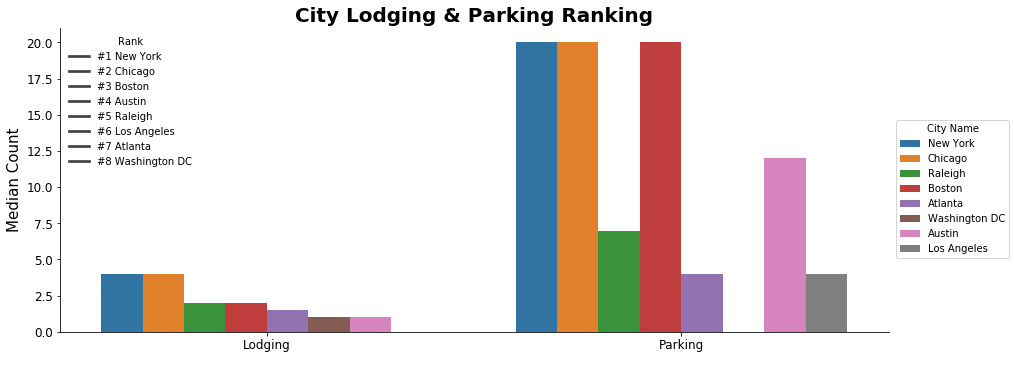

In [10]:
sns.factorplot(kind='bar',x='Type',y='Total Count',data=new_accomodation_df,
               hue='City Name', size=5, aspect=2.5)

total_count = new_accomodation_df.groupby(['City Name'])['Total Count'].median().sort_values()[::-1].reset_index()
total_count_df = pd.DataFrame(total_count)
print(total_count_df)
ranks_dict = {}
y=1
for name in total_count_df['City Name']:
    ranks_dict[name] = y
    y=y+1
print(ranks_dict)

plt.title('City Lodging & Parking Ranking', fontsize=20, fontweight='bold')

plt.xlabel(' ', fontsize=15)
plt.ylabel('Median Count', fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

new_labels = ['#1 New York ', '#2 Chicago',  '#3 Boston', '#4 Austin', '#5 Raleigh',
              '#6 Los Angeles', '#7 Atlanta ', '#8 Washington DC']
plt.legend(new_labels, loc='upper left', frameon=False, title='Rank')

plt.savefig('Save_Figs/Accomodation.png', bbox_inches='tight')

plt.show()